In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D


In [5]:
data_train_path = r'C:\Users\HP\Desktop\DEEP learning\Fruits_Vegetables\Fruits_Vegetables\train'
data_test_path = r'C:\Users\HP\Desktop\DEEP learning\Fruits_Vegetables\Fruits_Vegetables\test'
data_val_path = r'C:\Users\HP\Desktop\DEEP learning\Fruits_Vegetables\Fruits_Vegetables\validation'


In [6]:
img_width = 180
img_height = 180


In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [13]:
data_test  = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size =(img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 357 files belonging to 36 classes.


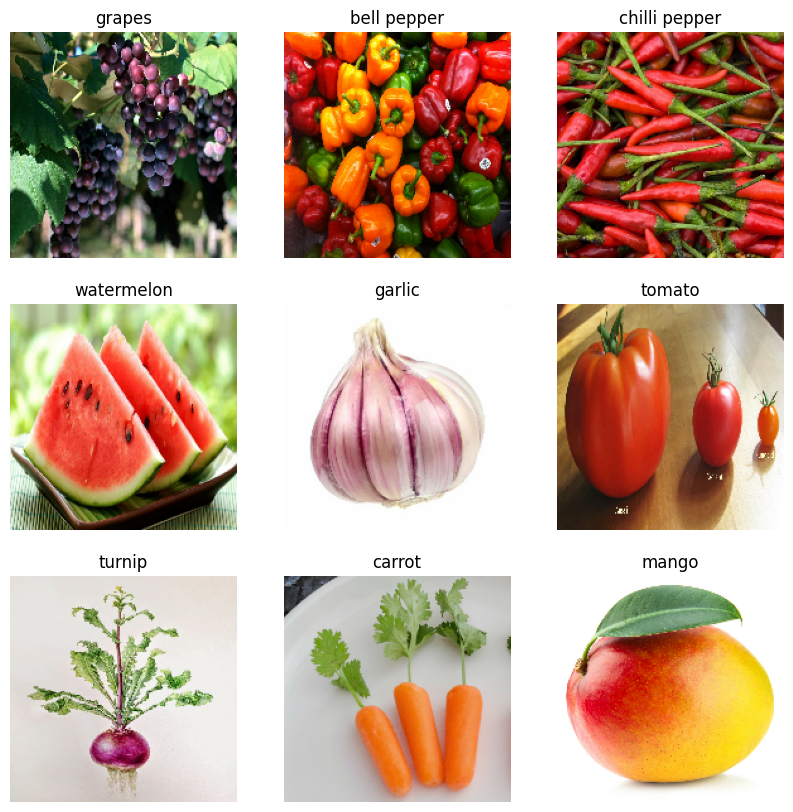

In [27]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [17]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:

history = model.fit(data_train,validation_data=data_val,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 758ms/step - accuracy: 0.9888 - loss: 0.0533 - val_accuracy: 0.9544 - val_loss: 0.4360
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 884ms/step - accuracy: 0.9888 - loss: 0.0772 - val_accuracy: 0.9544 - val_loss: 0.4060
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 723ms/step - accuracy: 0.9872 - loss: 0.0755 - val_accuracy: 0.9544 - val_loss: 0.3713
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 728ms/step - accuracy: 0.9891 - loss: 0.0694 - val_accuracy: 0.9544 - val_loss: 0.3233
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 741ms/step - accuracy: 0.9897 - loss: 0.0612 - val_accuracy: 0.9516 - val_loss: 0.3414
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 732ms/step - accuracy: 0.9897 - loss: 0.0582 - val_accuracy: 0.9516 - val_loss: 0.3101
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 728ms/step - accuracy: 0.9897 - loss: 0.0521 - val_accuracy: 0.9516 - val_loss: 0.2971
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 723ms/step - accuracy: 0.9900 - loss: 0.0535 - val_accu

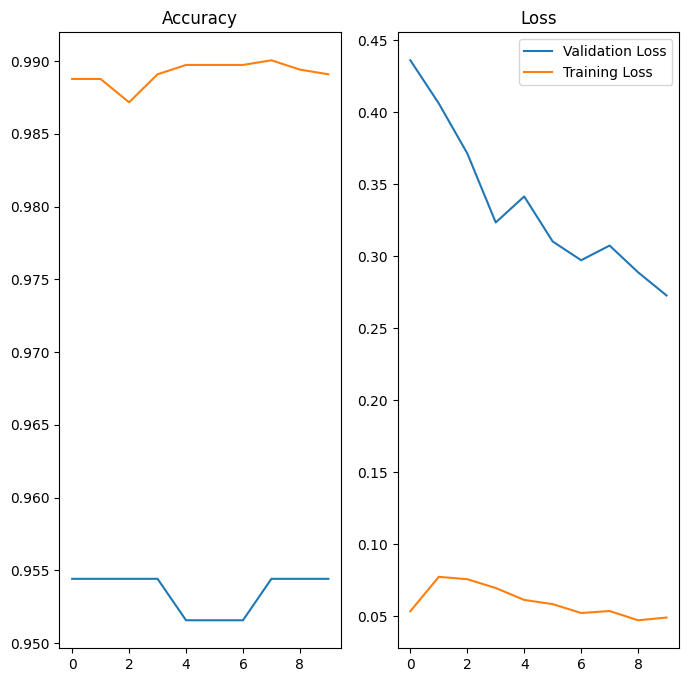

In [33]:
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.title("Accuracy")


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.title("Loss")
plt.legend()

In [54]:
img = 'Chilli.jpg'
image = tf.keras.utils.load_img(img,target_size=(img_height,img_width))
input_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(input_arr,0)

In [55]:
predictions = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [56]:
score = tf.nn.softmax(predictions)

In [47]:
print('Veg/fruit in image is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)],100*np.max(score)))

Veg/fruit in image is beetroot with accuracy of 99.93


In [57]:
print('Veg/fruit in image is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)],100*np.max(score)))

Veg/fruit in image is paprika with accuracy of 99.72


In [52]:
model.save('Image_classify.keras')